### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 6


### Дисциплина: Методы машинного обучения

##### Студент:  Петров Артем Евгеньевич
##### Группа:   НКНбд-01-21

## Москва 2024
***

## Задание:

1. Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую, валидационную и тестовую выборки. Если при дальнейшей работе с данными возникнет нехватка вычислительных ресурсов, то разрешение изображений можно уменьшить.  
2. Оставьте в наборе изображения, указанных в индивидуальном задании, и визуализируйте несколько изображений.
3. Постройте нейронные сети MLP, CNN и RNN для задачи многоклассовой классификации изображений (требования к архитектуре сетей указаны в индивидуальном задании), используя функцию потерь, указанную в индивидуальном задании. Подберите такие параметры, как функции активации, оптимизатор, начальная скорость обучения, размер мини-пакета и др. самостоятельно, обеспечивая обучение нейронных сетей. Обучайте нейронные сети с использованием валидационной выборки, сформированной в п. 1. Останавливайте обучение нейронных сетей в случае роста потерь на валидационной выборке на нескольких эпохах обучения подряд. Для каждой нейронной сети выведите количество потребовавшихся эпох обучения.  
4. Оцените качество многоклассовой классификации нейронными сетями MLP, CNN и RNN на тестовой выборке при помощи показателя качества, указанного в индивидуальном задании, и выведите архитектуру нейронной сети с лучшим качеством.  
5. Визуализируйте кривые обучения трех построенных моделей для показателя потерь на валидационной выборке на одном рисунке в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду. Используйте для визуализации относительные потери (потери, деленные на начальные потери на первой эпохе).
6. Визуализируйте кривые обучения трех построенных моделей для показателя доли верных ответов на валидационной выборке на одном рисунке в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.
7. Используя модель нейронной сети с лучшей долей верных ответов на тестовой выборке, определите для каждого из классов два изображения в тестовой выборке, имеющие минимальную и максимальную вероятности классификации в правильный класс, и визуализируйте эти изображения.
***

## Вариант 27

1. Набор данных oxford_iiit_pet с изменением разрешения до 60x96

2. Классы с метками 31,43,55,67

3. Требования к архитектуре сети MLP:

  Последовательный API с методом add() при создании

  Функция потерь: категориальная кросс-энтропия

  Кол-во скрытых слоев 4

  Кол-во нейронов 40 в первом скрытом слое, увеличивающееся на 20 с каждым последующим скрытым слоем

  Использование слоев с регуляризацией L1L2

4. Требования к архитектуре сети CNN:

  Функциональный API при создании

  Функция потерь: разреженная категориальная кросс-энтропия

  Кол-во слоев пулинга 3

  Количество фильтров в сверточных слоях 16

  Размеры фильтра 5х5

  Использование слоев пакетной нормализации

5. Требования к архитектуре сети RNN:

  Последовательный API со списком слоев при создании

  Функция потерь: категориальная кросс-энтропия

  Слой LSTM с 96 нейронами

  Использование слоев dropout

6. Показатель качества многоклассовой классификации:

  минимальная точность классов, где точность (precision) класса равна доле правильных предсказаний для всех точек, относимых классификатором к этому классу.
  ***


# 1. Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую, валидационную и тестовую выборки. Если при дальнейшей работе с данными возникнет нехватка вычислительных ресурсов, то разрешение изображений можно уменьшить.

1. Набор данных oxford_iiit_pet с изменением разрешения до 60x96

2. Классы с метками 31,43,55,67

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
ds_train = tfds.load("oxford_iiit_pet", split = 'train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/3680 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteJ391JR/oxford_iiit_pet-train.tfrecord*...:…

Generating test examples...:   0%|          | 0/3669 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteJ391JR/oxford_iiit_pet-test.tfrecord*...: …

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


In [3]:
ds_test = tfds.load("oxford_iiit_pet", split = 'test')

In [4]:
df_train = tfds.as_dataframe(ds_train)
df_train.head(2)

,file_name,image,label,segmentation_mask,species
0,b'Sphynx_158.jpg',"[[[3, 3, 3], [5, 3, 4], [7, 5, 6], [4, 2, 3], ...",33,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0
1,b'english_cocker_spaniel_135.jpg',"[[[5, 9, 8], [3, 4, 0], [11, 24, 4], [36, 51, ...",12,"[[[3], [3], [3], [3], [3], [3], [3], [3], [3],...",1


In [5]:
df_test = tfds.as_dataframe(ds_train)

In [6]:
print(type(df_train['image'][1]), df_train['image'][0].shape)

<class 'numpy.ndarray'> (500, 500, 3)


In [7]:
from PIL import Image

In [8]:
def decrease_size(img: np.ndarray) -> np.ndarray:
  need = (60, 96)
  res = Image.fromarray(img)
  ans = res.resize(need)
  return np.array(ans)

In [9]:
img = decrease_size(df_train['image'][4])
img.shape

(96, 60, 3)

In [10]:
df_train['image'] = df_train['image'].apply(decrease_size)

In [11]:
df_test['image'] = df_test['image'].apply(decrease_size)

In [12]:
df_train['image'][0].shape, df_train['image'][0].shape

((96, 60, 3), (96, 60, 3))

In [13]:
df_train['label'].value_counts()

label
33    100
21    100
29    100
13    100
30    100
34    100
16    100
20    100
19    100
27    100
31    100
18    100
26    100
23    100
24    100
4     100
15    100
8     100
28    100
10    100
9     100
2     100
36    100
5     100
6     100
25    100
35    100
14    100
3     100
0     100
1     100
17    100
32     99
7      96
22     96
12     96
11     93
Name: count, dtype: int64

array([[[232, 224,  87],
        [219, 211,  83],
        [222, 212,  79],
        ...,
        [141, 109,   2],
        [165, 135,   4],
        [190, 161,  23]],

       [[232, 224,  87],
        [214, 206,  79],
        [215, 205,  75],
        ...,
        [145, 112,   1],
        [166, 136,   5],
        [191, 162,  24]],

       [[232, 224,  89],
        [233, 224,  88],
        [230, 220,  80],
        ...,
        [147, 114,   2],
        [168, 136,   7],
        [192, 163,  25]],

       ...,

       [[202, 207, 184],
        [207, 217, 196],
        [203, 213, 186],
        ...,
        [117, 106,  75],
        [106,  93,  67],
        [103,  88,  67]],

       [[207, 214, 191],
        [204, 213, 188],
        [203, 214, 187],
        ...,
        [115, 102,  75],
        [105,  91,  68],
        [ 99,  84,  64]],

       [[210, 221, 200],
        [203, 214, 190],
        [200, 207, 183],
        ...,
        [115, 100,  68],
        [103,  89,  63],
        [ 94,  81,  59]]], dtype=uint8)
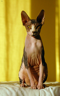

In [14]:
df_train['image'][4]

array([[[ 5,  4,  3],
        [ 6,  5,  4],
        [ 6,  4,  4],
        ...,
        [ 3,  3,  2],
        [ 2,  2,  2],
        [ 4,  2,  2]],

       [[ 3,  4,  3],
        [ 4,  5,  4],
        [ 4,  5,  4],
        ...,
        [ 4,  4,  4],
        [ 3,  2,  2],
        [ 3,  2,  3]],

       [[ 4,  4,  4],
        [ 4,  3,  3],
        [ 4,  4,  3],
        ...,
        [ 3,  3,  3],
        [ 2,  3,  3],
        [ 3,  3,  3]],

       ...,

       [[ 5,  7,  9],
        [ 6,  7,  9],
        [ 6,  8,  9],
        ...,
        [ 5,  7,  9],
        [ 5,  7,  8],
        [ 4,  6,  7]],

       [[ 6,  8,  9],
        [ 6,  8, 10],
        [ 5,  7,  9],
        ...,
        [ 4,  7,  7],
        [ 4,  6,  8],
        [ 4,  6,  8]],

       [[ 7,  8, 10],
        [ 5,  9, 10],
        [ 5,  8,  9],
        ...,
        [ 4,  7,  9],
        [ 5,  6,  8],
        [ 4,  6,  8]]], dtype=uint8)
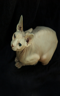

In [15]:
df_test['image'][0]

***
# 2. Оставьте в наборе изображения, указанных в индивидуальном задании, и визуализируйте несколько изображений.

2. Классы с метками 31,43,55,67

In [16]:
df_train = df_train[(df_train['label'] == 0) | (df_train['label'] == 10) | (df_train['label'] == 20) | (df_train['label'] == 31)]

In [131]:
df_train.head()

,file_name,image,label,segmentation_mask,species
13,b'chihuahua_187.jpg',"[[[3, 7, 6], [14, 20, 18], [10, 21, 17], [4, 1...",1,"[[[3], [3], [3], [3], [3], [3], [3], [3], [3],...",1
21,b'Abyssinian_196.jpg',"[[[116, 122, 120], [117, 123, 121], [119, 125,...",0,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0
46,b'Maine_Coon_10.jpg',"[[[3, 52, 51], [2, 47, 45], [2, 44, 43], [1, 3...",2,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0
51,b'shiba_inu_143.jpg',"[[[146, 166, 84], [147, 168, 84], [141, 162, 8...",3,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",1
61,b'Abyssinian_134.jpg',"[[[135, 135, 137], [133, 133, 135], [136, 137,...",0,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0


In [17]:
df_train['label'].value_counts()

label
10    100
0     100
20    100
31    100
Name: count, dtype: int64

In [18]:
df_test = df_test[(df_test['label'] == 0) | (df_test['label'] == 10) | (df_test['label'] == 20) | (df_test['label'] == 31)]

In [19]:
df_test['label'].value_counts()

label
10    100
0     100
20    100
31    100
Name: count, dtype: int64

***
# 3. Постройте нейронные сети MLP, CNN и RNN для задачи многоклассовой классификации изображений (требования к архитектуре сетей указаны в индивидуальном задании), используя функцию потерь, указанную в индивидуальном задании. Подберите такие параметры, как функции активации, оптимизатор, начальная скорость обучения, размер мини-пакета и др. самостоятельно, обеспечивая обучение нейронных сетей. Обучайте нейронные сети с использованием валидационной выборки, сформированной в п. 1. Останавливайте обучение нейронных сетей в случае роста потерь на валидационной выборке на нескольких эпохах обучения подряд. Для каждой нейронной сети выведите количество потребовавшихся эпох обучения.

In [20]:
normal_features = {0:0, 10:1, 20:2, 31:3}

In [21]:
df_train['label'] = df_train['label'].apply(lambda x: normal_features[x])

<ipython-input-21-c0304d02a927>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['label'] = df_train['label'].apply(lambda x: normal_features[x])


In [22]:
df_test['label'] = df_test['label'].apply(lambda x: normal_features[x])

<ipython-input-22-c3bb781bed57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['label'] = df_test['label'].apply(lambda x: normal_features[x])


In [23]:
# tmp = df_train['image'].apply(lambda x: x / 255)

In [24]:
# tmp.head()

In [25]:
def getX(arr: np.ndarray) -> np.ndarray:
  x = np.empty((400, 96, 60, 3))
  for i in range(arr.shape[0]):
    x[i] = arr[i] / 255
  return x

In [26]:
train_x = getX(df_train['image'].values)
train_x.shape

(400, 96, 60, 3)

In [27]:
test_x = getX(df_test['image'].values)
test_x.shape

(400, 96, 60, 3)

In [28]:
train_x[0]

array([[[0.01176471, 0.02745098, 0.02352941],
        [0.05490196, 0.07843137, 0.07058824],
        [0.03921569, 0.08235294, 0.06666667],
        ...,
        [0.09411765, 0.10588235, 0.12156863],
        [0.09411765, 0.09019608, 0.09411765],
        [0.09803922, 0.08627451, 0.09019608]],

       [[0.01568627, 0.03529412, 0.03137255],
        [0.05098039, 0.07843137, 0.07058824],
        [0.03921569, 0.0745098 , 0.0627451 ],
        ...,
        [0.09411765, 0.10588235, 0.12156863],
        [0.09411765, 0.09019608, 0.09803922],
        [0.09803922, 0.08235294, 0.09411765]],

       [[0.01960784, 0.03921569, 0.03529412],
        [0.05490196, 0.07843137, 0.07058824],
        [0.05882353, 0.08235294, 0.0745098 ],
        ...,
        [0.10196078, 0.10980392, 0.13333333],
        [0.10196078, 0.09411765, 0.11372549],
        [0.10588235, 0.09019608, 0.10980392]],

       ...,

       [[0.4745098 , 0.44313725, 0.4745098 ],
        [0.45490196, 0.42352941, 0.45490196],
        [0.41568627, 0

In [29]:
# train_x = np.empty((400, 96, 60, 3))
# for i in range(tmp.shape[0]):
#   train_x[i] = tmp.values[i]

In [30]:
# train_x[130].shape
# df_train['image'][21]
# train_x[0]

In [31]:
def to_one_hot(labels, dimension=3):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [32]:
train_y = to_one_hot(df_train['label'].values, 4)

In [33]:
test_y = to_one_hot(df_test['label'].values, 4)

In [34]:
type(train_y), type(train_x), type(test_y), type(test_x)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

## MLP:

3. Требования к архитектуре сети MLP:

  Последовательный API с методом add() при создании

  Функция потерь: категориальная кросс-энтропия

  Кол-во скрытых слоев 4

  Кол-во нейронов 40 в первом скрытом слое, увеличивающееся на 20 с каждым последующим скрытым слоем

  Использование слоев с регуляризацией L1L2

6. Показатель качества многоклассовой классификации:

  минимальная точность классов, где точность (precision) класса равна доле правильных предсказаний для всех точек, относимых классификатором к этому классу.

In [35]:
mlp = tf.keras.Sequential()
mlp.add(tf.keras.layers.Input(shape = (96, 60, 3)))
mlp.add(tf.keras.layers.Flatten())
mlp.add(tf.keras.layers.Dense(40, activation = 'relu', kernel_regularizer = tf.keras.regularizers.L1L2(0.001)))
mlp.add(tf.keras.layers.Dense(60, activation = 'relu', kernel_regularizer = tf.keras.regularizers.L1L2(0.001)))
mlp.add(tf.keras.layers.Dense(80, activation = 'relu', kernel_regularizer = tf.keras.regularizers.L1L2(0.001)))
mlp.add(tf.keras.layers.Dense(100, activation = 'relu', kernel_regularizer = tf.keras.regularizers.L1L2(0.001)))
mlp.add(tf.keras.layers.Dense(4, activation = 'softmax'))

In [36]:
mlp.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.01),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = [tf.keras.metrics.CategoricalAccuracy(name = "accuracy")]
)

In [37]:
mlp_hist = mlp.fit(
    x = train_x,
    y = train_y,
    verbose = 1,
    epochs = 300,
    batch_size = 64,
    validation_data = (test_x, test_y)
)

Epoch 1/300
7/7 [==============================] - 2s 103ms/step - loss: 8.4065 - accuracy: 0.2425 - val_loss: 6.8293 - val_accuracy: 0.2500
Epoch 2/300
7/7 [==============================] - 0s 35ms/step - loss: 5.9795 - accuracy: 0.3025 - val_loss: 4.8759 - val_accuracy: 0.2525
Epoch 3/300
7/7 [==============================] - 0s 26ms/step - loss: 4.4943 - accuracy: 0.2800 - val_loss: 4.0626 - val_accuracy: 0.3125
Epoch 4/300
7/7 [==============================] - 0s 34ms/step - loss: 3.8808 - accuracy: 0.3025 - val_loss: 3.6160 - val_accuracy: 0.2725
Epoch 5/300
7/7 [==============================] - 0s 29ms/step - loss: 3.5075 - accuracy: 0.3025 - val_loss: 3.3285 - val_accuracy: 0.3725
Epoch 6/300
7/7 [==============================] - 0s 25ms/step - loss: 3.2245 - accuracy: 0.3250 - val_loss: 3.0681 - val_accuracy: 0.3250
Epoch 7/300
7/7 [==============================] - 0s 26ms/step - loss: 3.0432 - accuracy: 0.3025 - val_loss: 3.0339 - val_accuracy: 0.3550
Epoch 8/300
7/7 [==

## Как мы видим, нейросеть обучилась, и теперь она определяет принадлежность к фотографии к классу(всего их 4) с вероятностью 86 для валидационной выборки на последней эпохе(хотя на предыдущих было больше)

## *CNN*

In [38]:
train_y = df_train['label'].values
# test_y =

In [39]:
train_y[:10]

array([1, 0, 2, 3, 0, 3, 1, 2, 0, 0])

In [40]:
test_y = df_test['label'].values

In [41]:
test_y[:10]

array([1, 0, 2, 3, 0, 3, 1, 2, 0, 0])

*Требования к архитектуре сети CNN:*

  - Функциональный API при создании

  - Функция потерь: разреженная категориальная кросс-энтропия

  - Кол-во слоев пулинга 3

  - Количество фильтров в сверточных слоях 16

  - Размеры фильтра 5х5

  - Использование слоев пакетной нормализации

In [42]:
inputs = tf.keras.layers.Input(shape = (96, 60, 3))

In [43]:
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (5, 5), activation = 'relu')(inputs)

In [44]:
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size = (2, 2), padding = 'same')(x)

In [45]:
x = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), activation = 'relu')(x)

In [46]:
# x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size = (2, 2), padding = 'same')(x)

In [47]:
x = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), activation = 'relu')(x)

In [48]:
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size = (2, 2), padding = 'same')(x)

In [49]:
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(rate = 0.25)(x)
x = tf.keras.layers.Dense(256, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(4, activation = 'softmax')(x)

In [50]:
cnn = tf.keras.Model(inputs = inputs, outputs = outputs)
cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 60, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 92, 56, 64)        4864      
                                                                 
 batch_normalization (Batch  (None, 92, 56, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 46, 28, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 24, 32)        51232     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 21, 12, 32)        0     

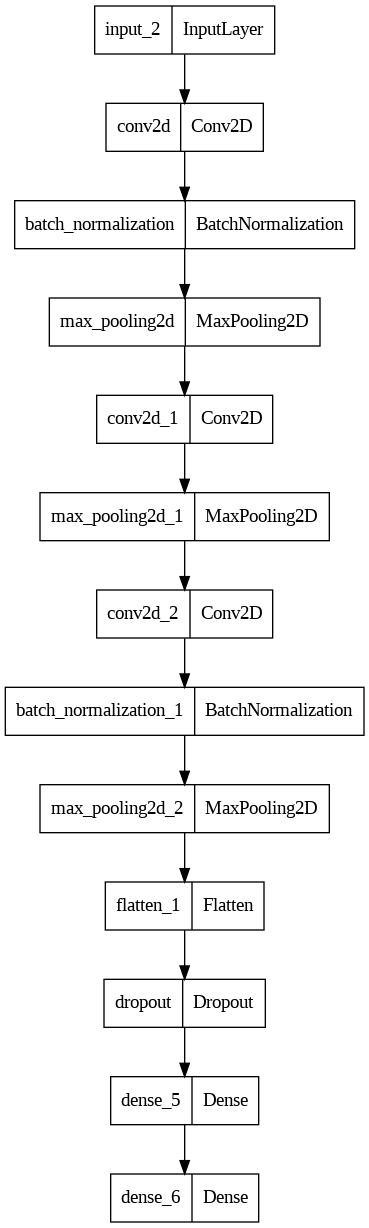

In [51]:
tf.keras.utils.plot_model(cnn)

In [52]:
cnn.compile(
    loss =tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [53]:
cnn_hist = cnn.fit(
    x = train_x,
    y = train_y,
    epochs = 20,
    verbose = 1,
    batch_size = 128,
    validation_data = (test_x, test_y)
)

Epoch 1/20
4/4 [==============================] - 13s 3s/step - loss: 1.8118 - sparse_categorical_accuracy: 0.3175 - val_loss: 1.3917 - val_sparse_categorical_accuracy: 0.2525
Epoch 2/20
4/4 [==============================] - 9s 2s/step - loss: 1.3815 - sparse_categorical_accuracy: 0.4550 - val_loss: 1.3403 - val_sparse_categorical_accuracy: 0.3200
Epoch 3/20
4/4 [==============================] - 11s 2s/step - loss: 1.2798 - sparse_categorical_accuracy: 0.4650 - val_loss: 1.3968 - val_sparse_categorical_accuracy: 0.2750
Epoch 4/20
4/4 [==============================] - 12s 3s/step - loss: 1.1278 - sparse_categorical_accuracy: 0.5450 - val_loss: 1.3484 - val_sparse_categorical_accuracy: 0.3125
Epoch 5/20
4/4 [==============================] - 11s 3s/step - loss: 1.0189 - sparse_categorical_accuracy: 0.5825 - val_loss: 1.3068 - val_sparse_categorical_accuracy: 0.3900
Epoch 6/20
4/4 [==============================] - 10s 3s/step - loss: 0.8536 - sparse_categorical_accuracy: 0.6575 - val_

## К сожалению, CNN переобучилась, из-за чего точность составляет 25%, что не лучше случайного выбора принадлежности фотографии к одному из четырёх имеющихся классов

## RNN
Требования к архитектуре сети RNN:

  - Последовательный API со списком слоев при создании

  - Функция потерь: категориальная кросс-энтропия

  - Слой LSTM с 96 нейронами

  - Использование слоев dropout

In [54]:
train_y = to_one_hot(df_train['label'].values, 4)

In [55]:
test_y = to_one_hot(df_test['label'].values, 4)

In [56]:
from PIL import ImageOps

In [57]:
def grayscale_img(x: np.ndarray) -> np.ndarray:
  img = ImageOps.grayscale(Image.fromarray(x).resize((96, 96)))
  res = np.array(img)
  return res

In [58]:
def getX(arr: np.ndarray) -> np.ndarray:
  x = np.empty((400, 96, 96))
  for i in range(arr.shape[0]):
    x[i] = arr[i] / 255
  return x

In [59]:
train_x = getX(df_train['image'].apply(grayscale_img).values)

In [60]:
train_x.shape

(400, 96, 96)

In [61]:
test_x = getX(df_test['image'].apply(grayscale_img).values)

In [65]:
rnn = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(96, input_shape = (None, 96)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(4, activation = 'softmax')
])

In [66]:
rnn.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = [tf.keras.metrics.CategoricalAccuracy()]
)

In [67]:
rnn_hist = rnn.fit(
    train_x, train_y, epochs = 50, batch_size = 64, validation_data = (test_x, test_y)
)

Epoch 1/50
7/7 [==============================] - 5s 308ms/step - loss: 1.6488 - categorical_accuracy: 0.2650 - val_loss: 1.3867 - val_categorical_accuracy: 0.2775
Epoch 2/50
7/7 [==============================] - 1s 154ms/step - loss: 1.4225 - categorical_accuracy: 0.3575 - val_loss: 1.3742 - val_categorical_accuracy: 0.2775
Epoch 3/50
7/7 [==============================] - 2s 259ms/step - loss: 1.3782 - categorical_accuracy: 0.3450 - val_loss: 1.3655 - val_categorical_accuracy: 0.3000
Epoch 4/50
7/7 [==============================] - 2s 288ms/step - loss: 1.3218 - categorical_accuracy: 0.3900 - val_loss: 1.3594 - val_categorical_accuracy: 0.2975
Epoch 5/50
7/7 [==============================] - 1s 168ms/step - loss: 1.2966 - categorical_accuracy: 0.3850 - val_loss: 1.3637 - val_categorical_accuracy: 0.3475
Epoch 6/50
7/7 [==============================] - 1s 156ms/step - loss: 1.2587 - categorical_accuracy: 0.4275 - val_loss: 1.3550 - val_categorical_accuracy: 0.3800
Epoch 7/50
7/7 [

## RNN отлично справилась с задачей. Нейросеть однозначно обучилась, так как потери на каждой эпохе уменьшались, а точность для двух выборок(тестовой и валидационной) повысилась до 80-86%

***
# 4. Оцените качество многоклассовой классификации нейронными сетями MLP, CNN и RNN на тестовой выборке при помощи показателя качества, указанного в индивидуальном задании, и выведите архитектуру нейронной сети с лучшим качеством.  

Из трех нейросетей самый большой показатель качества на тестовой выборке -- MLP, который обгоняет RNN всего на 2%. На третьем же месте стоит CNN, который не обучился вовсе. Стоит отметить, что RNN и MLP делят первое место, так как на каждом из новых запусков меняется победитель.

***
# 5. Визуализируйте кривые обучения трех построенных моделей для показателя потерь на валидационной выборке на одном рисунке в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду. Используйте для визуализации относительные потери (потери, деленные на начальные потери на первой эпохе).

In [101]:
def plot_loss(hist: tf.keras.callbacks.History, epochs:int, lim = False):
  plt.plot(np.arange(1, epochs+1), hist.history['loss'], label='Потери на тренировочной выборке')
  plt.plot(np.arange(1, epochs+1), hist.history['val_loss'], label='Потери на валидационной выборке')
  plt.title('Показатели потери нейронной сети', size=20)
  plt.xlabel('Эпохи', size=14)
  if lim:
    plt.ylim([0, max(hist.history['loss'])*0.5])
  plt.grid(True)
  plt.legend();

In [120]:
def plot_metrics(hist: tf.keras.callbacks.History, metrics_name: str, epochs: int):
  plt.plot(np.arange(1, epochs+1), hist.history[metrics_name], label=metrics_name + ' на тренировочоной')
  plt.plot(np.arange(1, epochs+1), hist.history['val_'+metrics_name], label=metrics_name + ' на валидационной выборке')
  plt.title(f'Показатели метрики {metrics_name} нейронной сети', size=20)
  plt.xlabel('Эпохи', size=14)
  plt.grid(True)
  plt.legend();

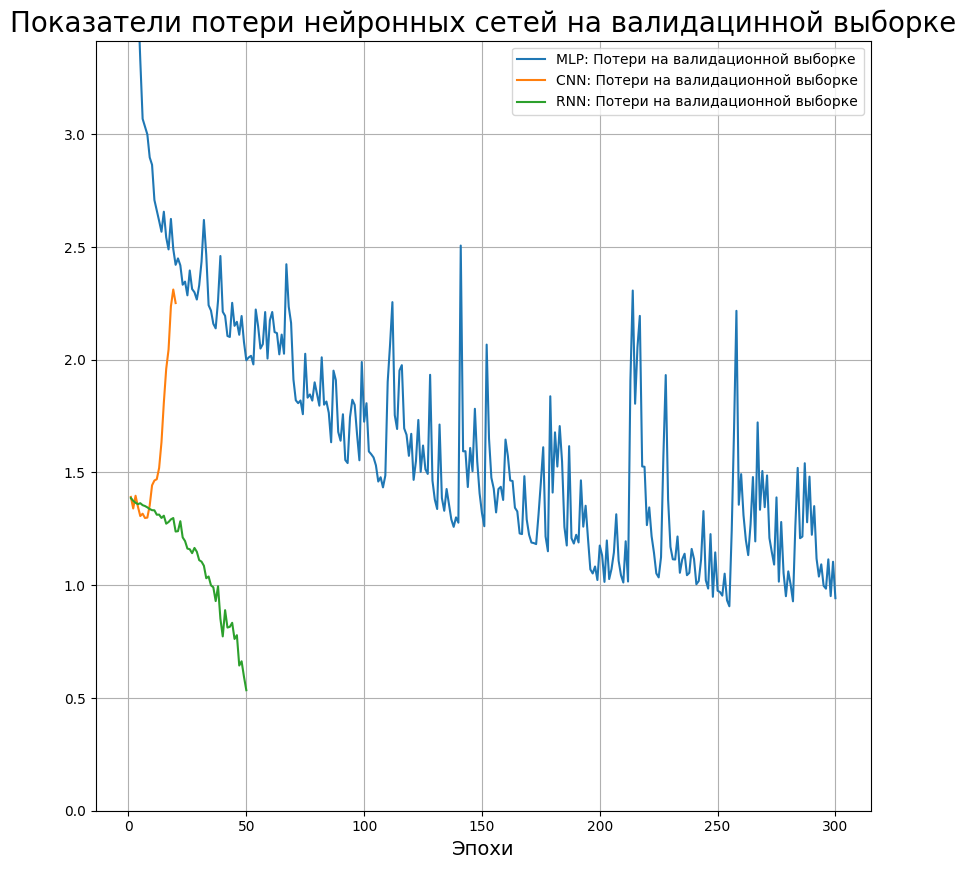

In [128]:
plt.figure(figsize = (10, 10))
plt.plot(np.arange(1, 301), mlp_hist.history['val_loss'], label='MLP: Потери на валидационной выборке')
plt.plot(np.arange(1, 21), cnn_hist.history['val_loss'], label='CNN: Потери на валидационной выборке')
plt.plot(np.arange(1, 51), rnn_hist.history['val_loss'], label='RNN: Потери на валидационной выборке')
plt.ylim([0, max(mlp_hist.history['val_loss']) * 0.5])
plt.title('Показатели потери нейронных сетей на валидацинной выборке', size=20)
plt.xlabel('Эпохи', size=14)
plt.grid(True)
plt.legend();

## MLP

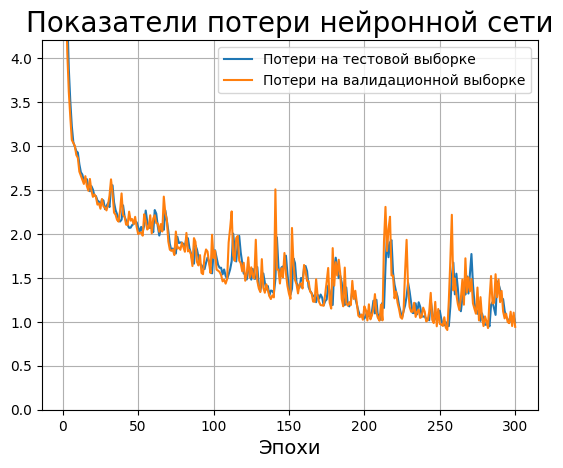

In [121]:
plot_loss(mlp_hist, epochs = 300, lim = True)

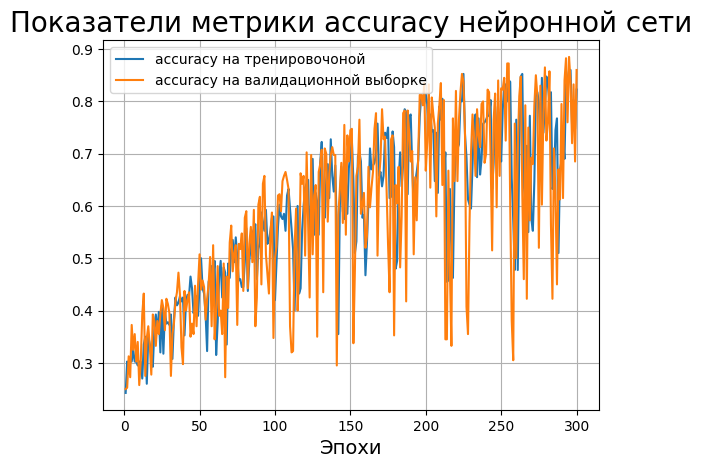

In [122]:
plot_metrics(mlp_hist, epochs = 300, metrics_name = 'accuracy')

## CNN

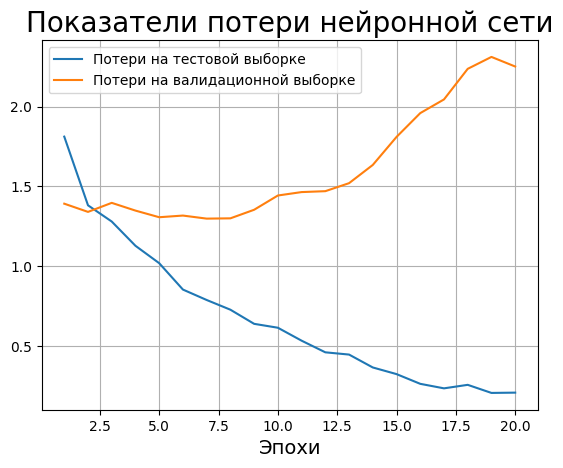

In [123]:
plot_loss(cnn_hist, epochs = 20)

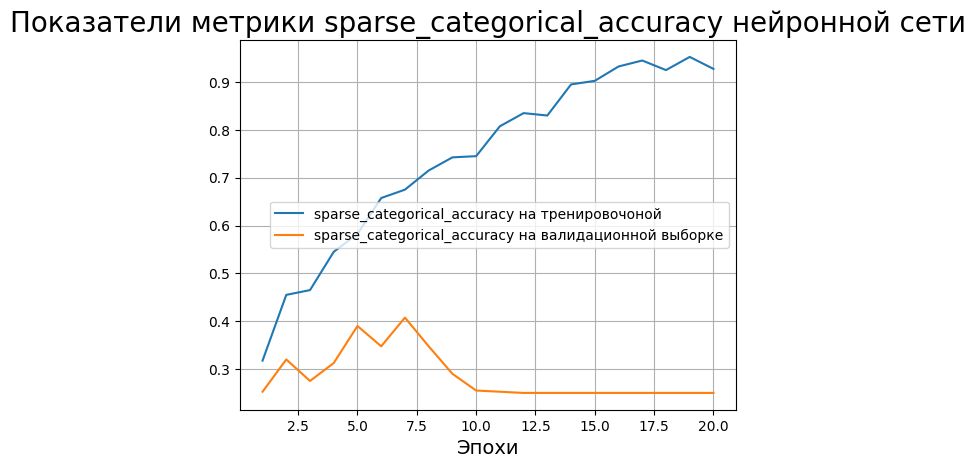

In [124]:
plot_metrics(cnn_hist, epochs = 20, metrics_name = 'sparse_categorical_accuracy')

## RNN

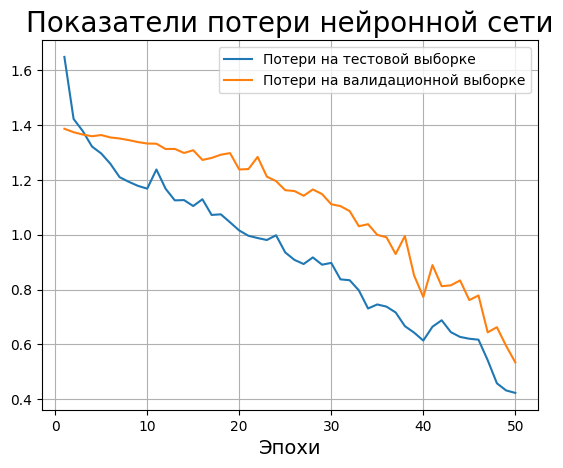

In [125]:
plot_loss(rnn_hist, epochs = 50)

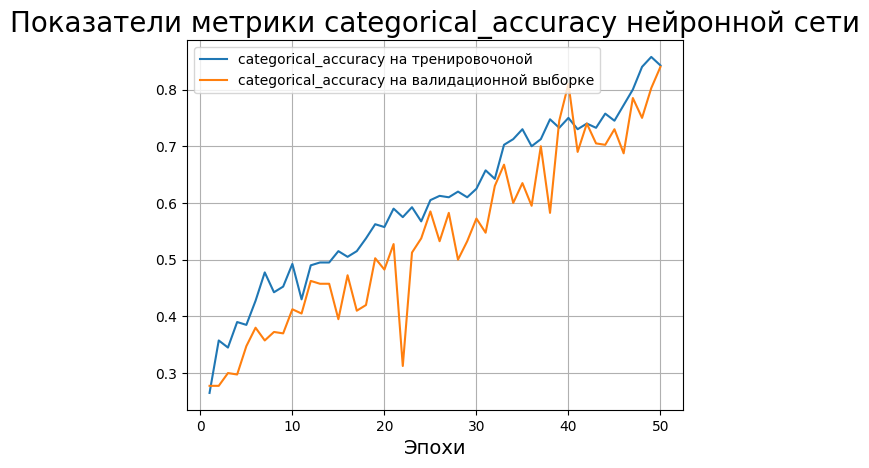

In [126]:
plot_metrics(rnn_hist, epochs=50, metrics_name = 'categorical_accuracy')

***
# 6. Визуализируйте кривые обучения трех построенных моделей для показателя доли верных ответов на валидационной выборке на одном рисунке в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

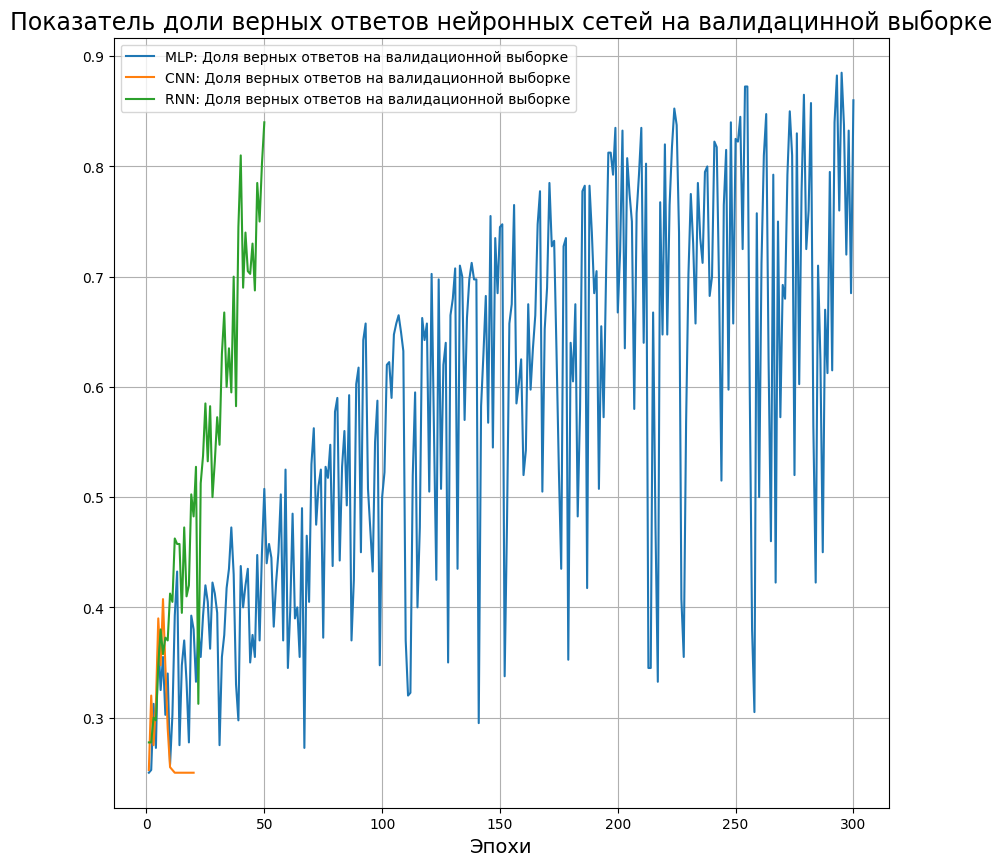

In [130]:
plt.figure(figsize = (10, 10))
plt.plot(np.arange(1, 301), mlp_hist.history['val_accuracy'], label='MLP: Доля верных ответов на валидационной выборке')
plt.plot(np.arange(1, 21), cnn_hist.history['val_sparse_categorical_accuracy'], label='CNN: Доля верных ответов на валидационной выборке')
plt.plot(np.arange(1, 51), rnn_hist.history['val_categorical_accuracy'], label='RNN: Доля верных ответов на валидационной выборке')
# plt.ylim([0, max(mlp_hist.history['val_loss']) * 0.5])
plt.title('Показатель доли верных ответов нейронных сетей на валидацинной выборке', size=17)
plt.xlabel('Эпохи', size=14)
plt.grid(True)
plt.legend()

***
# 7. Используя модель нейронной сети с лучшей долей верных ответов на тестовой выборке, определите для каждого из классов два изображения в тестовой выборке, имеющие минимальную и максимальную вероятности классификации в правильный класс, и визуализируйте эти изображения.

In [134]:
def getX(arr: np.ndarray) -> np.ndarray:
  x = np.empty((400, 96, 60, 3))
  for i in range(arr.shape[0]):
    x[i] = arr[i] / 255
  return x

In [135]:
test_x = getX(df_test['image'].values)

In [140]:
test_x[0].shape

(96, 60, 3)

In [142]:
predict_x = mlp.predict(test_x[:2])

1/1 [==============================] - 0s 62ms/step


In [145]:
test_y = to_one_hot(df_test['label'].values, 4)

In [161]:
predict_x

array([[6.6302741e-06, 9.7155231e-01, 2.6608919e-04, 2.8175112e-02],
       [7.2865081e-01, 4.3131722e-04, 2.6179436e-01, 9.1234269e-03]],
      dtype=float32)

In [165]:
predict_x[0][np.argmax(predict_x[0])]

0.9715523

In [179]:
def find_min_prob(model: tf.keras.Model, test_x, test_y):
  pred_y = mlp.predict(test_x)

  tp_indexes = []

  min_prob = 2
  for i in range(len(test_y)):
    if np.argmax(pred_y[i]) == np.argmax(test_y[i]):
      if pred_y[i][np.argmax(pred_y[i])] < min_prob:
        min_prob = pred_y[i][np.argmax(pred_y[i])]
        tp_indexes.append([i, min_prob])


  return tp_indexes[len(tp_indexes)-3:len(tp_indexes)-1]


In [180]:
find_min_prob(mlp, test_x, test_y)

13/13 [==============================] - 0s 4ms/step


[[25, 0.528391], [68, 0.5116516]]

Данная функция определяет две минимальные вероятности определения фотографии к верному классу и возвращает индексы фотографий и саму вероятность

array([[[ 33,  31,  34],
        [ 35,  33,  36],
        [ 36,  34,  37],
        ...,
        [ 96,  95, 107],
        [118, 120, 132],
        [139, 141, 153]],

       [[ 33,  31,  34],
        [ 34,  32,  35],
        [ 35,  33,  36],
        ...,
        [ 98,  97, 108],
        [124, 126, 139],
        [136, 138, 150]],

       [[ 34,  32,  35],
        [ 34,  32,  35],
        [ 35,  33,  36],
        ...,
        [ 96,  95, 107],
        [128, 130, 142],
        [140, 142, 154]],

       ...,

       [[ 28,  26,  29],
        [ 28,  26,  29],
        [ 29,  27,  30],
        ...,
        [ 15,   2,   2],
        [ 14,   3,   3],
        [ 10,   2,   0]],

       [[ 30,  28,  31],
        [ 30,  28,  31],
        [ 28,  26,  29],
        ...,
        [ 15,   2,   2],
        [ 14,   3,   3],
        [ 10,   2,   0]],

       [[ 27,  25,  28],
        [ 28,  26,  29],
        [ 28,  26,  29],
        ...,
        [ 15,   2,   2],
        [ 14,   3,   3],
        [ 10,   2,   0]]], dtype=uint8)
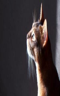

In [181]:
df_test['image'].values[25]

array([[[ 75,  36,  17],
        [ 80,  44,  23],
        [ 89,  62,  31],
        ...,
        [143, 150, 144],
        [139, 145, 137],
        [135, 140, 134]],

       [[ 75,  42,  20],
        [ 77,  40,  20],
        [ 89,  62,  30],
        ...,
        [143, 150, 143],
        [139, 145, 138],
        [134, 140, 134]],

       [[ 77,  51,  21],
        [ 68,  43,  22],
        [ 88,  60,  30],
        ...,
        [142, 152, 143],
        [139, 146, 138],
        [134, 140, 133]],

       ...,

       [[148, 145, 130],
        [147, 143, 128],
        [152, 146, 133],
        ...,
        [ 12,   9,   4],
        [ 16,  17,  13],
        [ 19,  21,  19]],

       [[148, 144, 134],
        [142, 139, 126],
        [142, 137, 125],
        ...,
        [ 71,  68,  50],
        [ 13,  12,   4],
        [ 16,  19,  15]],

       [[135, 129, 119],
        [141, 134, 123],
        [150, 144, 130],
        ...,
        [132, 129, 111],
        [ 46,  42,  29],
        [ 13,  12,   6]]], dtype=uint8)
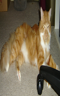

In [174]:
df_test['image'].values[68]

## Ф-ция определния минимальной вероятности правильного определения класса для фотографии

In [182]:
def find_min_prob_for_class(model: tf.keras.Model, test_x, test_y, feature: int):
  pred_y = mlp.predict(test_x)

  tp_indexes = []

  min_prob = 2
  for i in range(len(test_y)):
    if np.argmax(pred_y[i]) == np.argmax(test_y[i]) == feature:
      if pred_y[i][np.argmax(pred_y[i])] < min_prob:
        min_prob = pred_y[i][np.argmax(pred_y[i])]
        tp_indexes.append([i, min_prob])


  return tp_indexes[len(tp_indexes)-3:len(tp_indexes)-1]

***
## Класс 0 -- Abyssinian (cat)

In [183]:
find_min_prob_for_class(mlp, test_x, test_y, 0)

13/13 [==============================] - 0s 14ms/step


[[14, 0.67092186], [25, 0.528391]]

array([[[212, 178, 103],
        [210, 176,  99],
        [211, 178,  99],
        ...,
        [197, 163,  93],
        [197, 163,  94],
        [194, 160,  90]],

       [[210, 177,  97],
        [208, 175,  95],
        [209, 176,  97],
        ...,
        [195, 161,  88],
        [193, 159,  88],
        [193, 158,  87]],

       [[209, 176,  95],
        [208, 176,  94],
        [209, 176,  95],
        ...,
        [194, 160,  87],
        [191, 157,  86],
        [194, 159,  87]],

       ...,

       [[121,  93,  29],
        [117,  88,  22],
        [122,  92,  23],
        ...,
        [ 96,  70,  10],
        [104,  73,  12],
        [106,  75,  14]],

       [[115,  87,  31],
        [114,  85,  25],
        [121,  90,  29],
        ...,
        [ 98,  73,  17],
        [106,  76,  17],
        [108,  78,  16]],

       [[127,  99,  48],
        [131, 103,  48],
        [118,  90,  36],
        ...,
        [102,  78,  22],
        [101,  77,  21],
        [100,  72,  19]]], dtype=uint8)
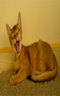

In [185]:
df_test['image'].values[14]

array([[[ 33,  31,  34],
        [ 35,  33,  36],
        [ 36,  34,  37],
        ...,
        [ 96,  95, 107],
        [118, 120, 132],
        [139, 141, 153]],

       [[ 33,  31,  34],
        [ 34,  32,  35],
        [ 35,  33,  36],
        ...,
        [ 98,  97, 108],
        [124, 126, 139],
        [136, 138, 150]],

       [[ 34,  32,  35],
        [ 34,  32,  35],
        [ 35,  33,  36],
        ...,
        [ 96,  95, 107],
        [128, 130, 142],
        [140, 142, 154]],

       ...,

       [[ 28,  26,  29],
        [ 28,  26,  29],
        [ 29,  27,  30],
        ...,
        [ 15,   2,   2],
        [ 14,   3,   3],
        [ 10,   2,   0]],

       [[ 30,  28,  31],
        [ 30,  28,  31],
        [ 28,  26,  29],
        ...,
        [ 15,   2,   2],
        [ 14,   3,   3],
        [ 10,   2,   0]],

       [[ 27,  25,  28],
        [ 28,  26,  29],
        [ 28,  26,  29],
        ...,
        [ 15,   2,   2],
        [ 14,   3,   3],
        [ 10,   2,   0]]], dtype=uint8)
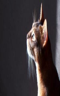

In [186]:
df_test['image'].values[25]

***
## Класс 1 -- chihuahua

In [187]:
find_min_prob_for_class(mlp, test_x, test_y, 1)

13/13 [==============================] - 0s 4ms/step


[[18, 0.8699674], [28, 0.6345469]]

array([[[14,  4,  2],
        [16,  6,  4],
        [16,  6,  4],
        ...,
        [23, 19, 11],
        [21, 16, 11],
        [20, 15,  9]],

       [[14,  4,  2],
        [16,  6,  4],
        [16,  6,  4],
        ...,
        [23, 20, 12],
        [22, 17, 11],
        [20, 15,  9]],

       [[14,  4,  2],
        [16,  6,  4],
        [16,  6,  4],
        ...,
        [24, 20, 13],
        [23, 18, 12],
        [20, 15,  9]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [22, 11,  4],
        [35, 22, 16],
        [30, 18, 11]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [26, 17, 11],
        [23, 14, 12],
        [13,  5,  3]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [23, 12,  9],
        [16, 10,  8],
        [ 6,  2,  1]]], dtype=uint8)
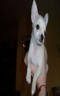

In [188]:
df_test['image'].values[18]

array([[[18, 34, 33],
        [19, 35, 34],
        [17, 33, 32],
        ...,
        [23, 38, 37],
        [23, 37, 37],
        [27, 41, 41]],

       [[16, 32, 31],
        [20, 36, 35],
        [18, 34, 33],
        ...,
        [23, 38, 38],
        [24, 38, 38],
        [28, 42, 42]],

       [[17, 33, 32],
        [19, 35, 34],
        [22, 38, 37],
        ...,
        [20, 35, 35],
        [24, 38, 38],
        [23, 37, 37]],

       ...,

       [[37, 53, 52],
        [32, 48, 47],
        [36, 52, 51],
        ...,
        [27, 43, 41],
        [30, 46, 45],
        [22, 38, 37]],

       [[24, 40, 39],
        [32, 48, 47],
        [36, 52, 51],
        ...,
        [25, 41, 39],
        [32, 48, 47],
        [25, 41, 40]],

       [[19, 35, 34],
        [32, 48, 47],
        [32, 48, 47],
        ...,
        [23, 39, 37],
        [32, 48, 47],
        [30, 46, 45]]], dtype=uint8)
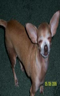

In [189]:
df_test['image'].values[28]

***
## Класс 2 -- Maine_Coon

In [190]:
find_min_prob_for_class(mlp, test_x, test_y, 2)

13/13 [==============================] - 0s 6ms/step


[[51, 0.5447994], [68, 0.5116516]]

array([[[ 10,   3,   3],
        [  6,   3,   5],
        [  5,   4,   9],
        ...,
        [ 36,   8,   4],
        [ 34,   7,   4],
        [ 31,   7,   5]],

       [[ 10,   3,   3],
        [  6,   2,   5],
        [  5,   4,   9],
        ...,
        [ 37,   8,   5],
        [ 35,   7,   5],
        [ 33,   7,   5]],

       [[ 10,   3,   2],
        [  6,   4,   5],
        [  5,   4,   9],
        ...,
        [ 36,   8,   4],
        [ 34,   7,   4],
        [ 35,   7,   5]],

       ...,

       [[135, 124, 123],
        [144, 134, 131],
        [147, 138, 134],
        ...,
        [138, 129, 130],
        [132, 124, 126],
        [106,  96, 100]],

       [[136, 126, 125],
        [142, 132, 129],
        [148, 138, 135],
        ...,
        [105,  95,  98],
        [104,  92,  96],
        [100,  89,  93]],

       [[136, 127, 125],
        [139, 129, 127],
        [147, 137, 135],
        ...,
        [103,  93,  95],
        [103,  93,  95],
        [ 98,  88,  92]]], dtype=uint8)
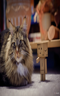

In [191]:
df_test['image'].values[51]

array([[[ 75,  36,  17],
        [ 80,  44,  23],
        [ 89,  62,  31],
        ...,
        [143, 150, 144],
        [139, 145, 137],
        [135, 140, 134]],

       [[ 75,  42,  20],
        [ 77,  40,  20],
        [ 89,  62,  30],
        ...,
        [143, 150, 143],
        [139, 145, 138],
        [134, 140, 134]],

       [[ 77,  51,  21],
        [ 68,  43,  22],
        [ 88,  60,  30],
        ...,
        [142, 152, 143],
        [139, 146, 138],
        [134, 140, 133]],

       ...,

       [[148, 145, 130],
        [147, 143, 128],
        [152, 146, 133],
        ...,
        [ 12,   9,   4],
        [ 16,  17,  13],
        [ 19,  21,  19]],

       [[148, 144, 134],
        [142, 139, 126],
        [142, 137, 125],
        ...,
        [ 71,  68,  50],
        [ 13,  12,   4],
        [ 16,  19,  15]],

       [[135, 129, 119],
        [141, 134, 123],
        [150, 144, 130],
        ...,
        [132, 129, 111],
        [ 46,  42,  29],
        [ 13,  12,   6]]], dtype=uint8)
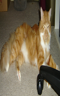

In [192]:
df_test['image'].values[68]

***
## Класс 3 - shiba_inu

In [193]:
find_min_prob_for_class(mlp, test_x, test_y, 3)

13/13 [==============================] - 0s 8ms/step


[[3, 0.72566915], [13, 0.6561771]]

array([[[146, 166,  84],
        [147, 168,  84],
        [141, 162,  87],
        ...,
        [ 96,  97,  53],
        [137, 144,  78],
        [144, 153,  90]],

       [[139, 160,  73],
        [124, 144,  65],
        [143, 164,  82],
        ...,
        [122, 106,  96],
        [110,  97,  84],
        [132, 118,  95]],

       [[140, 162,  80],
        [137, 158,  81],
        [139, 161,  82],
        ...,
        [198, 177, 156],
        [167, 148, 133],
        [129, 112, 101]],

       ...,

       [[182, 157, 127],
        [186, 160, 130],
        [193, 166, 136],
        ...,
        [174, 154, 128],
        [176, 155, 129],
        [176, 155, 129]],

       [[185, 159, 129],
        [185, 160, 130],
        [188, 163, 133],
        ...,
        [163, 143, 118],
        [172, 150, 124],
        [181, 161, 137]],

       [[187, 163, 133],
        [185, 161, 130],
        [181, 158, 126],
        ...,
        [157, 136, 110],
        [161, 140, 114],
        [177, 161, 137]]], dtype=uint8)
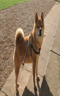

In [194]:
df_test['image'].values[3]

array([[[177, 151, 108],
        [166, 141,  97],
        [188, 160, 119],
        ...,
        [217, 187, 158],
        [206, 183, 141],
        [185, 174, 133]],

       [[198, 158, 115],
        [176, 142, 102],
        [161, 134, 102],
        ...,
        [193, 167, 127],
        [189, 164, 113],
        [182, 162, 110]],

       [[199, 152, 110],
        [200, 152, 113],
        [204, 164, 129],
        ...,
        [209, 188, 153],
        [189, 160, 118],
        [168, 137,  91]],

       ...,

       [[177, 128,  98],
        [162, 123,  92],
        [174, 136, 104],
        ...,
        [161, 133, 100],
        [162, 129,  98],
        [142, 104,  72]],

       [[135,  92,  59],
        [133, 103,  74],
        [163, 140, 111],
        ...,
        [116,  90,  61],
        [ 92,  66,  40],
        [112,  86,  58]],

       [[146, 105,  76],
        [154, 119,  88],
        [162, 128,  96],
        ...,
        [134, 110,  73],
        [103,  82,  53],
        [ 77,  65,  34]]], dtype=uint8)
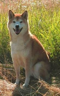

In [195]:
df_test['image'].values[13]

***
## Функция определения максимальной вероятности причисления к правильному классу

In [204]:
def find_max_prob_for_class(model: tf.keras.Model, test_x, test_y, feature: int):
  pred_y = mlp.predict(test_x)

  tp_indexes = []

  max_prob = 0
  for i in range(len(test_y)):
    if np.argmax(pred_y[i]) == np.argmax(test_y[i]) == feature:
      if pred_y[i][np.argmax(pred_y[i])] > max_prob:
        max_prob = pred_y[i][np.argmax(pred_y[i])]
        tp_indexes.append([i, max_prob])

  return tp_indexes[len(tp_indexes)-3:len(tp_indexes)-1]

***
## Класс 0 -- Abyssinian (cat)

In [205]:
find_max_prob_for_class(mlp, test_x, test_y, 0)

13/13 [==============================] - 0s 4ms/step


[[1, 0.7286509], [47, 0.78715193]]

array([[[116, 122, 120],
        [117, 123, 121],
        [119, 125, 123],
        ...,
        [138, 142, 143],
        [137, 143, 143],
        [138, 144, 144]],

       [[114, 120, 118],
        [116, 122, 120],
        [120, 126, 123],
        ...,
        [138, 142, 143],
        [137, 143, 143],
        [138, 144, 144]],

       [[115, 121, 117],
        [117, 123, 119],
        [120, 126, 122],
        ...,
        [138, 142, 143],
        [137, 143, 143],
        [136, 142, 142]],

       ...,

       [[123, 119, 105],
        [122, 119, 104],
        [123, 120, 105],
        ...,
        [169, 170, 165],
        [169, 170, 165],
        [166, 167, 162]],

       [[131, 124, 110],
        [137, 131, 116],
        [125, 119, 104],
        ...,
        [169, 170, 165],
        [169, 170, 165],
        [166, 167, 162]],

       [[121, 116, 101],
        [134, 128, 112],
        [112, 105,  88],
        ...,
        [170, 170, 165],
        [169, 170, 165],
        [166, 167, 162]]], dtype=uint8)
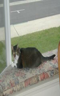

In [206]:
df_test['image'].values[1]

array([[[182, 173, 161],
        [186, 175, 166],
        [178, 167, 156],
        ...,
        [227, 224, 219],
        [220, 214, 204],
        [217, 212, 201]],

       [[182, 171, 160],
        [186, 175, 165],
        [175, 163, 150],
        ...,
        [227, 223, 215],
        [219, 213, 204],
        [218, 212, 201]],

       [[189, 179, 169],
        [190, 181, 174],
        [177, 165, 155],
        ...,
        [220, 212, 204],
        [216, 208, 197],
        [216, 208, 196]],

       ...,

       [[129, 114,  95],
        [134, 120, 102],
        [124, 110,  95],
        ...,
        [221, 212, 200],
        [211, 200, 187],
        [211, 201, 189]],

       [[134, 120, 103],
        [131, 118, 102],
        [107,  92,  73],
        ...,
        [217, 209, 199],
        [213, 203, 192],
        [205, 193, 178]],

       [[173, 164, 155],
        [136, 124, 109],
        [113,  99,  82],
        ...,
        [214, 204, 193],
        [217, 208, 199],
        [209, 199, 185]]], dtype=uint8)
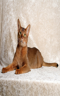

In [207]:
df_test['image'].values[47]

***
## Класс 1 -- chihuahua

In [208]:
find_max_prob_for_class(mlp, test_x, test_y, 1)

13/13 [==============================] - 0s 8ms/step


[[131, 0.9996285], [254, 0.99971163]]

array([[[  2,   2,   2],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1]],

       [[ 30,  30,  30],
        [101, 101, 101],
        [ 93,  93,  93],
        ...,
        [ 94,  94,  94],
        [ 93,  93,  93],
        [ 38,  38,  38]],

       [[ 39,  39,  39],
        [153, 153, 153],
        [141, 141, 141],
        ...,
        [145, 145, 145],
        [118, 118, 118],
        [ 26,  26,  26]],

       ...,

       [[ 47,  47,  47],
        [149, 149, 149],
        [ 83,  83,  83],
        ...,
        [ 77,  77,  77],
        [ 67,  67,  67],
        [ 18,  18,  18]],

       [[ 38,  38,  38],
        [ 81,  81,  81],
        [ 36,  36,  36],
        ...,
        [ 39,  39,  39],
        [ 38,  38,  38],
        [ 13,  13,  13]],

       [[  7,   7,   7],
        [  9,   9,   9],
        [  4,   4,   4],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  6,   6,   6]]], dtype=uint8)
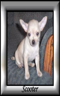

In [210]:
df_test['image'].values[131]

array([[[135, 149, 160],
        [136, 146, 156],
        [156, 164, 170],
        ...,
        [245, 250, 233],
        [244, 252, 245],
        [202, 223, 227]],

       [[134, 147, 158],
        [137, 148, 156],
        [153, 160, 167],
        ...,
        [224, 221, 233],
        [229, 230, 240],
        [208, 203, 220]],

       [[138, 149, 159],
        [141, 150, 158],
        [147, 152, 158],
        ...,
        [255, 209, 231],
        [255, 210, 228],
        [254, 204, 228]],

       ...,

       [[127, 161,  81],
        [148, 177, 121],
        [162, 186, 136],
        ...,
        [173, 190, 151],
        [227, 240, 221],
        [239, 248, 251]],

       [[121, 156,  70],
        [145, 174, 116],
        [159, 184, 130],
        ...,
        [162, 183, 135],
        [183, 199, 174],
        [227, 239, 241]],

       [[133, 173,  78],
        [140, 170, 107],
        [144, 168, 113],
        ...,
        [140, 165, 109],
        [194, 214, 188],
        [226, 240, 242]]], dtype=uint8)
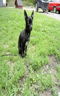

In [209]:
df_test['image'].values[254]

***
## Класс 2 -- Maine_Coon

In [211]:
find_max_prob_for_class(mlp, test_x, test_y, 2)

13/13 [==============================] - 0s 4ms/step


[[23, 0.6633381], [74, 0.6653939]]

array([[[ 40,  46,  44],
        [ 38,  45,  43],
        [ 44,  49,  47],
        ...,
        [ 63,  81,  88],
        [ 63,  81,  89],
        [ 64,  80,  90]],

       [[ 41,  47,  46],
        [ 40,  45,  43],
        [ 44,  49,  49],
        ...,
        [ 66,  86,  92],
        [ 68,  85,  94],
        [ 68,  85,  96]],

       [[ 43,  48,  46],
        [ 45,  50,  48],
        [ 47,  52,  51],
        ...,
        [ 71,  89,  98],
        [ 73,  90,  99],
        [ 73,  91, 102]],

       ...,

       [[107,  73,  29],
        [116,  78,  32],
        [124,  85,  35],
        ...,
        [178, 154, 119],
        [175, 151, 112],
        [173, 149, 109]],

       [[105,  68,  26],
        [117,  78,  33],
        [125,  86,  37],
        ...,
        [173, 150, 117],
        [174, 150, 116],
        [169, 146, 109]],

       [[107,  70,  27],
        [121,  85,  40],
        [120,  81,  32],
        ...,
        [168, 146, 114],
        [168, 145, 113],
        [167, 146, 113]]], dtype=uint8)
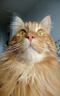

In [212]:
df_test['image'].values[23]

array([[[161, 160, 156],
        [154, 154, 149],
        [159, 159, 154],
        ...,
        [140, 140, 136],
        [137, 136, 132],
        [132, 131, 128]],

       [[166, 165, 161],
        [154, 154, 150],
        [157, 158, 153],
        ...,
        [144, 144, 140],
        [142, 141, 137],
        [137, 137, 133]],

       [[169, 168, 164],
        [171, 171, 167],
        [171, 172, 167],
        ...,
        [147, 147, 143],
        [145, 145, 142],
        [142, 141, 139]],

       ...,

       [[128, 126, 119],
        [130, 127, 120],
        [130, 128, 120],
        ...,
        [  8,   7,   4],
        [  7,   4,   2],
        [ 33,  25,  20]],

       [[122, 122, 116],
        [125, 124, 116],
        [127, 125, 117],
        ...,
        [  6,   5,   3],
        [  7,   5,   3],
        [ 16,  12,   9]],

       [[118, 118, 112],
        [120, 120, 113],
        [122, 121, 114],
        ...,
        [  6,   3,   2],
        [  1,   1,   1],
        [  8,   6,   4]]], dtype=uint8)
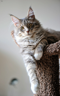

In [213]:
df_test['image'].values[74]

***
## Класс 3 - shiba_inu

In [214]:
find_max_prob_for_class(mlp, test_x, test_y, 3)

13/13 [==============================] - 0s 6ms/step


[[124, 0.8576575], [214, 0.8579204]]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
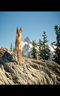

In [215]:
df_test['image'].values[124]

array([[[ 90, 105,  95],
        [ 94, 115, 110],
        [110, 115,  98],
        ...,
        [141, 155, 109],
        [125, 147,  95],
        [ 75,  96,  56]],

       [[ 94, 113, 107],
        [ 86, 107, 105],
        [123, 127, 113],
        ...,
        [124, 128, 100],
        [131, 142, 100],
        [111, 124,  80]],

       [[106, 127, 124],
        [101, 125, 122],
        [114, 125, 110],
        ...,
        [107, 113,  75],
        [124, 120,  96],
        [147, 145, 108]],

       ...,

       [[ 25,  69,  26],
        [ 17,  50,  13],
        [ 23,  44,  28],
        ...,
        [ 85, 106,  74],
        [ 87, 115,  92],
        [ 94, 105,  87]],

       [[ 19,  58,  24],
        [ 20,  59,  23],
        [ 28,  63,  35],
        ...,
        [ 62,  73,  36],
        [ 69,  96,  73],
        [113, 144, 116]],

       [[ 10,  52,  17],
        [ 16,  41,  16],
        [ 22,  58,  29],
        ...,
        [107, 118,  89],
        [ 68,  85,  63],
        [112, 145, 115]]], dtype=uint8)
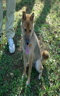

In [216]:
df_test['image'].values[214]

***
# *Вывод*: На этой контрольной мы построили три нейронные сети: MLP, CNN, RNN. MLP и RNN обучились очень хорошо(можно было даже дообучить). Однако, CNN у нас переобучилась, но точность не стала лучше случайной классификации. Хотелось бы отметить, что RNN показала себя лучше всего, так как хватило даже 50 эпох для хорошего обучения.